# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.keys())
print(breast_cancer.feature_names)
print(breast_cancer.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
features = breast_cancer.data
target = breast_cancer.target
target_names = breast_cancer.target_names
labels = target_names[target]

In [5]:
malignant_mean_radius = features[labels=='malignant',0]
malignant_radius_error = features[labels=='malignant',10]
malignant = np.c_[malignant_mean_radius, malignant_radius_error] 

In [6]:
benign_mean_radius = features[labels=='benign',0]
benign_radius_error = features[labels=='benign',10]
benign = np.c_[benign_mean_radius, benign_radius_error] 

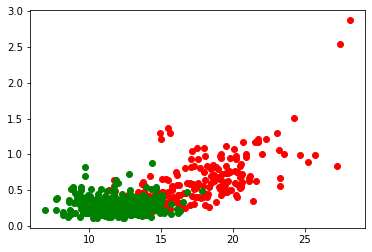

In [7]:
plt.scatter(malignant[:,0],malignant[:,1],color='red')
plt.scatter(benign[:,0],benign[:,1],color='green')

In [8]:
training_data = np.r_[malignant, benign]
training_labels = np.r_[np.zeros(len(malignant)),np.ones(len(benign))]
print(training_data.shape)
print(training_labels.shape)

(569, 2)
(569,)


In [9]:
clf = svm.LinearSVC()
clf.fit(training_data,training_labels)

C:\Users\NTU\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [10]:
def SVM_plot(clf,title): #(演算法,演算法名稱)
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(malignant[:,0],malignant[:,1],color='red')
    plt.scatter(benign[:,0],benign[:,1],color='green')
    plt.title(title)
    plt.show()

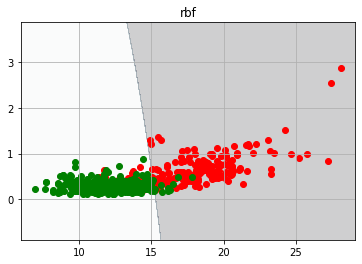

In [11]:
clf = svm.SVC(kernel='rbf')
clf.fit(training_data,training_labels)
SVM_plot(clf,'rbf')

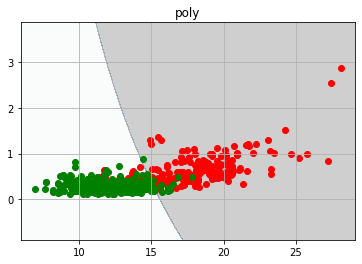

In [12]:
clf = svm.SVC(kernel='poly')
clf.fit(training_data,training_labels)
SVM_plot(clf,'poly')

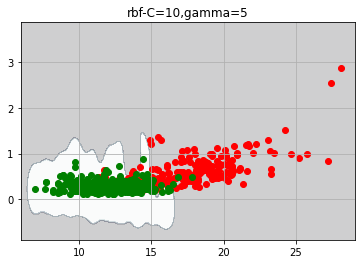

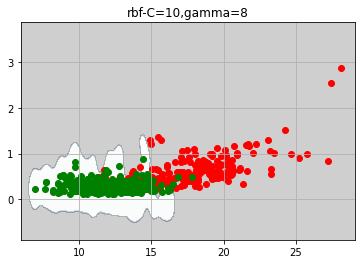

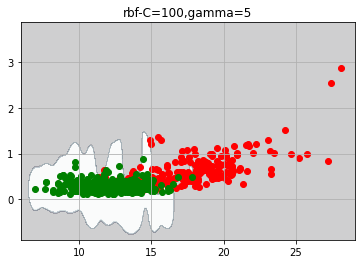

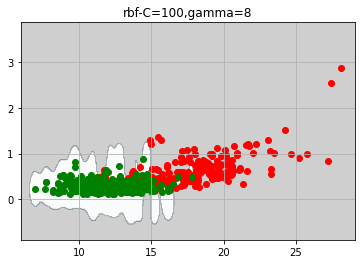

In [13]:
C = [10,100]
gamma = [5,8]

for i in range(len(C)):
    for j in range(len(gamma)):
        #print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='rbf',C=C[i],gamma=gamma[j])
        clf.fit(training_data,training_labels)
        SVM_plot(clf,'rbf-C={0},gamma={1}'.format(C[i],gamma[j]))

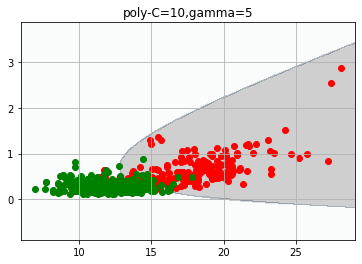

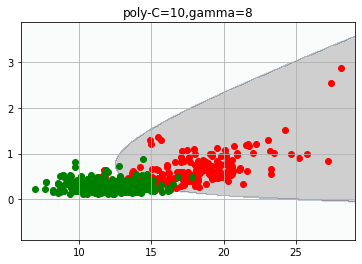

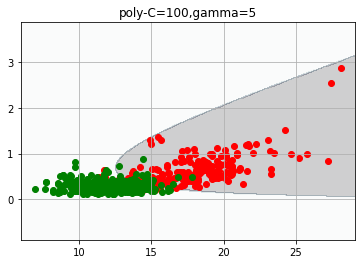

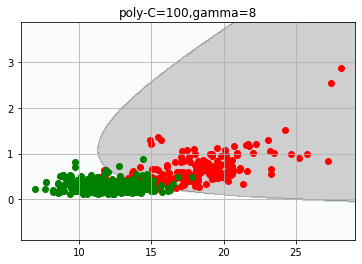

In [14]:
C = [10,100]
gamma = [5,8]

for i in range(len(C)):
    for j in range(len(gamma)):
        #print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='poly',C=C[i],gamma=gamma[j])
        clf.fit(training_data,training_labels)
        SVM_plot(clf,'poly-C={0},gamma={1}'.format(C[i],gamma[j]))

## Step1. 下載資料

In [15]:
X = breast_cancer.data
y = breast_cancer.target

## Step2. 區分訓練集與測試集

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

## Step3. 建模

In [17]:
clf = svm.SVC(kernel='rbf',gamma=5,C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma=5)

## Step4. 預測

```

```


In [18]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Step5. 準確度分析

In [19]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.631578947368421
